# Loan Application Status Prediction

## Data Description
To build a Claasification model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 


Import required libraries

In [40]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [41]:
df=pd.read_csv('Loan status.csv')

df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Data has been imported and we can see the first 5 rows of the data using df.head() function

## EDA

In [3]:
df.shape

(614, 13)

This is the shape of data

In [42]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

These are the datatypes of each columns which includes integer, object and float values 

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

These are the columns of data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

The data has null values

In [8]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002524,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In ApplicantIncome,CoapplicantIncome,Loan amount mean is higher than median.

Standard deviation is higher in  CoapplicantIncome column.

In few columns there is a huge difference between 75th percentile and max column which means there are oultiers.

We cannot see values of many other columns because they have object data

In [9]:
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

Target variable only has two values yes and no which means it is a binary classification

In [10]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

This column has nan values

## Converting data types

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Loan_Status','Property_Area']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
    
    df=df.replace(np.nan,df.mean())
    

Object datatype converted and all the null values are replaced with mean

In [44]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1
613,613,0,0,0,0,1,4583,0.0,133.0,360.0,0.0,1,0


In [45]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All the null values are removed

In [15]:
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

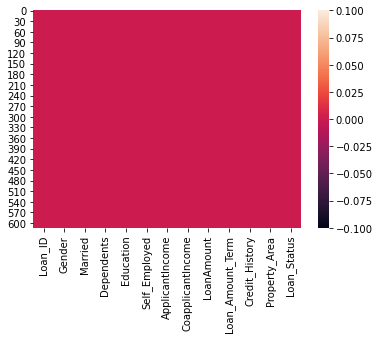

In [16]:
sns.heatmap(df.isnull())

There are no missing data or null values 

In [17]:
dfcor=df.corr()
dfcor

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.007403,-0.018621,0.055139,0.039442,0.005039,0.016925,0.039211,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.007403,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.136081,-0.067778,-0.000490,-0.030903,0.008690
Married,-0.018621,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.145541,-0.096253,0.010302,0.007973,0.096657
Dependents,0.055139,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.130722,-0.073683,-0.077539,0.032600,-0.007318
Education,0.039442,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.005039,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.089806,-0.036965,0.052701,-0.013439,0.010880
ApplicantIncome,0.016925,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.035684,0.136081,0.145541,0.130722,-0.166998,0.089806,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.067778,-0.096253,-0.073683,-0.077242,-0.036965,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974


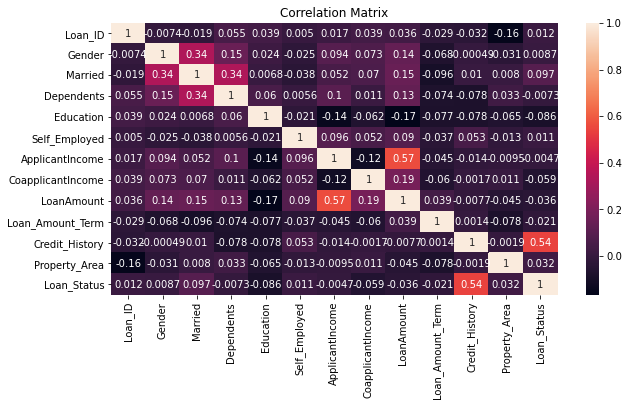

In [18]:
plt.figure(figsize=[10,5])
sns.heatmap(dfcor,annot=True)
plt.title("Correlation Matrix")
plt.show()

CoapplicantIncome and ApplicantIncome are negatively correlated to each other

Loan_Status and Credit_History are positively correlated to each other

Loan_Amount and Applicant_income are highly correlated with each other

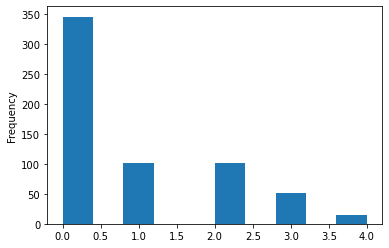

In [90]:
df['Dependents'].plot.hist()

Dependents with 0.0 to 0.4 has highest frequency

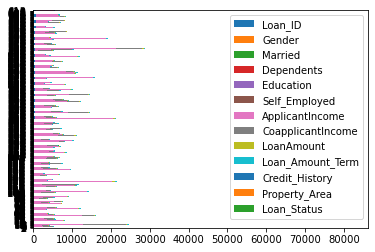

In [19]:
df.plot.barh(stacked=True)

Horizontal Bar graph

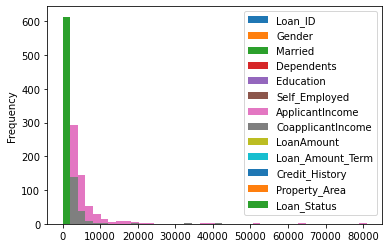

In [26]:
df.plot.hist(bins=40)

Loan_status has the highest frequency  of 0 and 1.

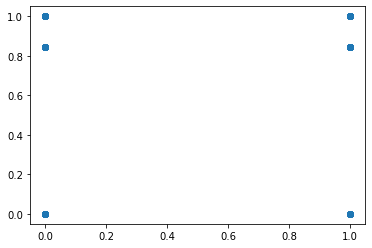

In [20]:
plt.scatter(df['Loan_Status'],df['Credit_History'])

The scatter plot stating the relation of Loan_Status and Credit History

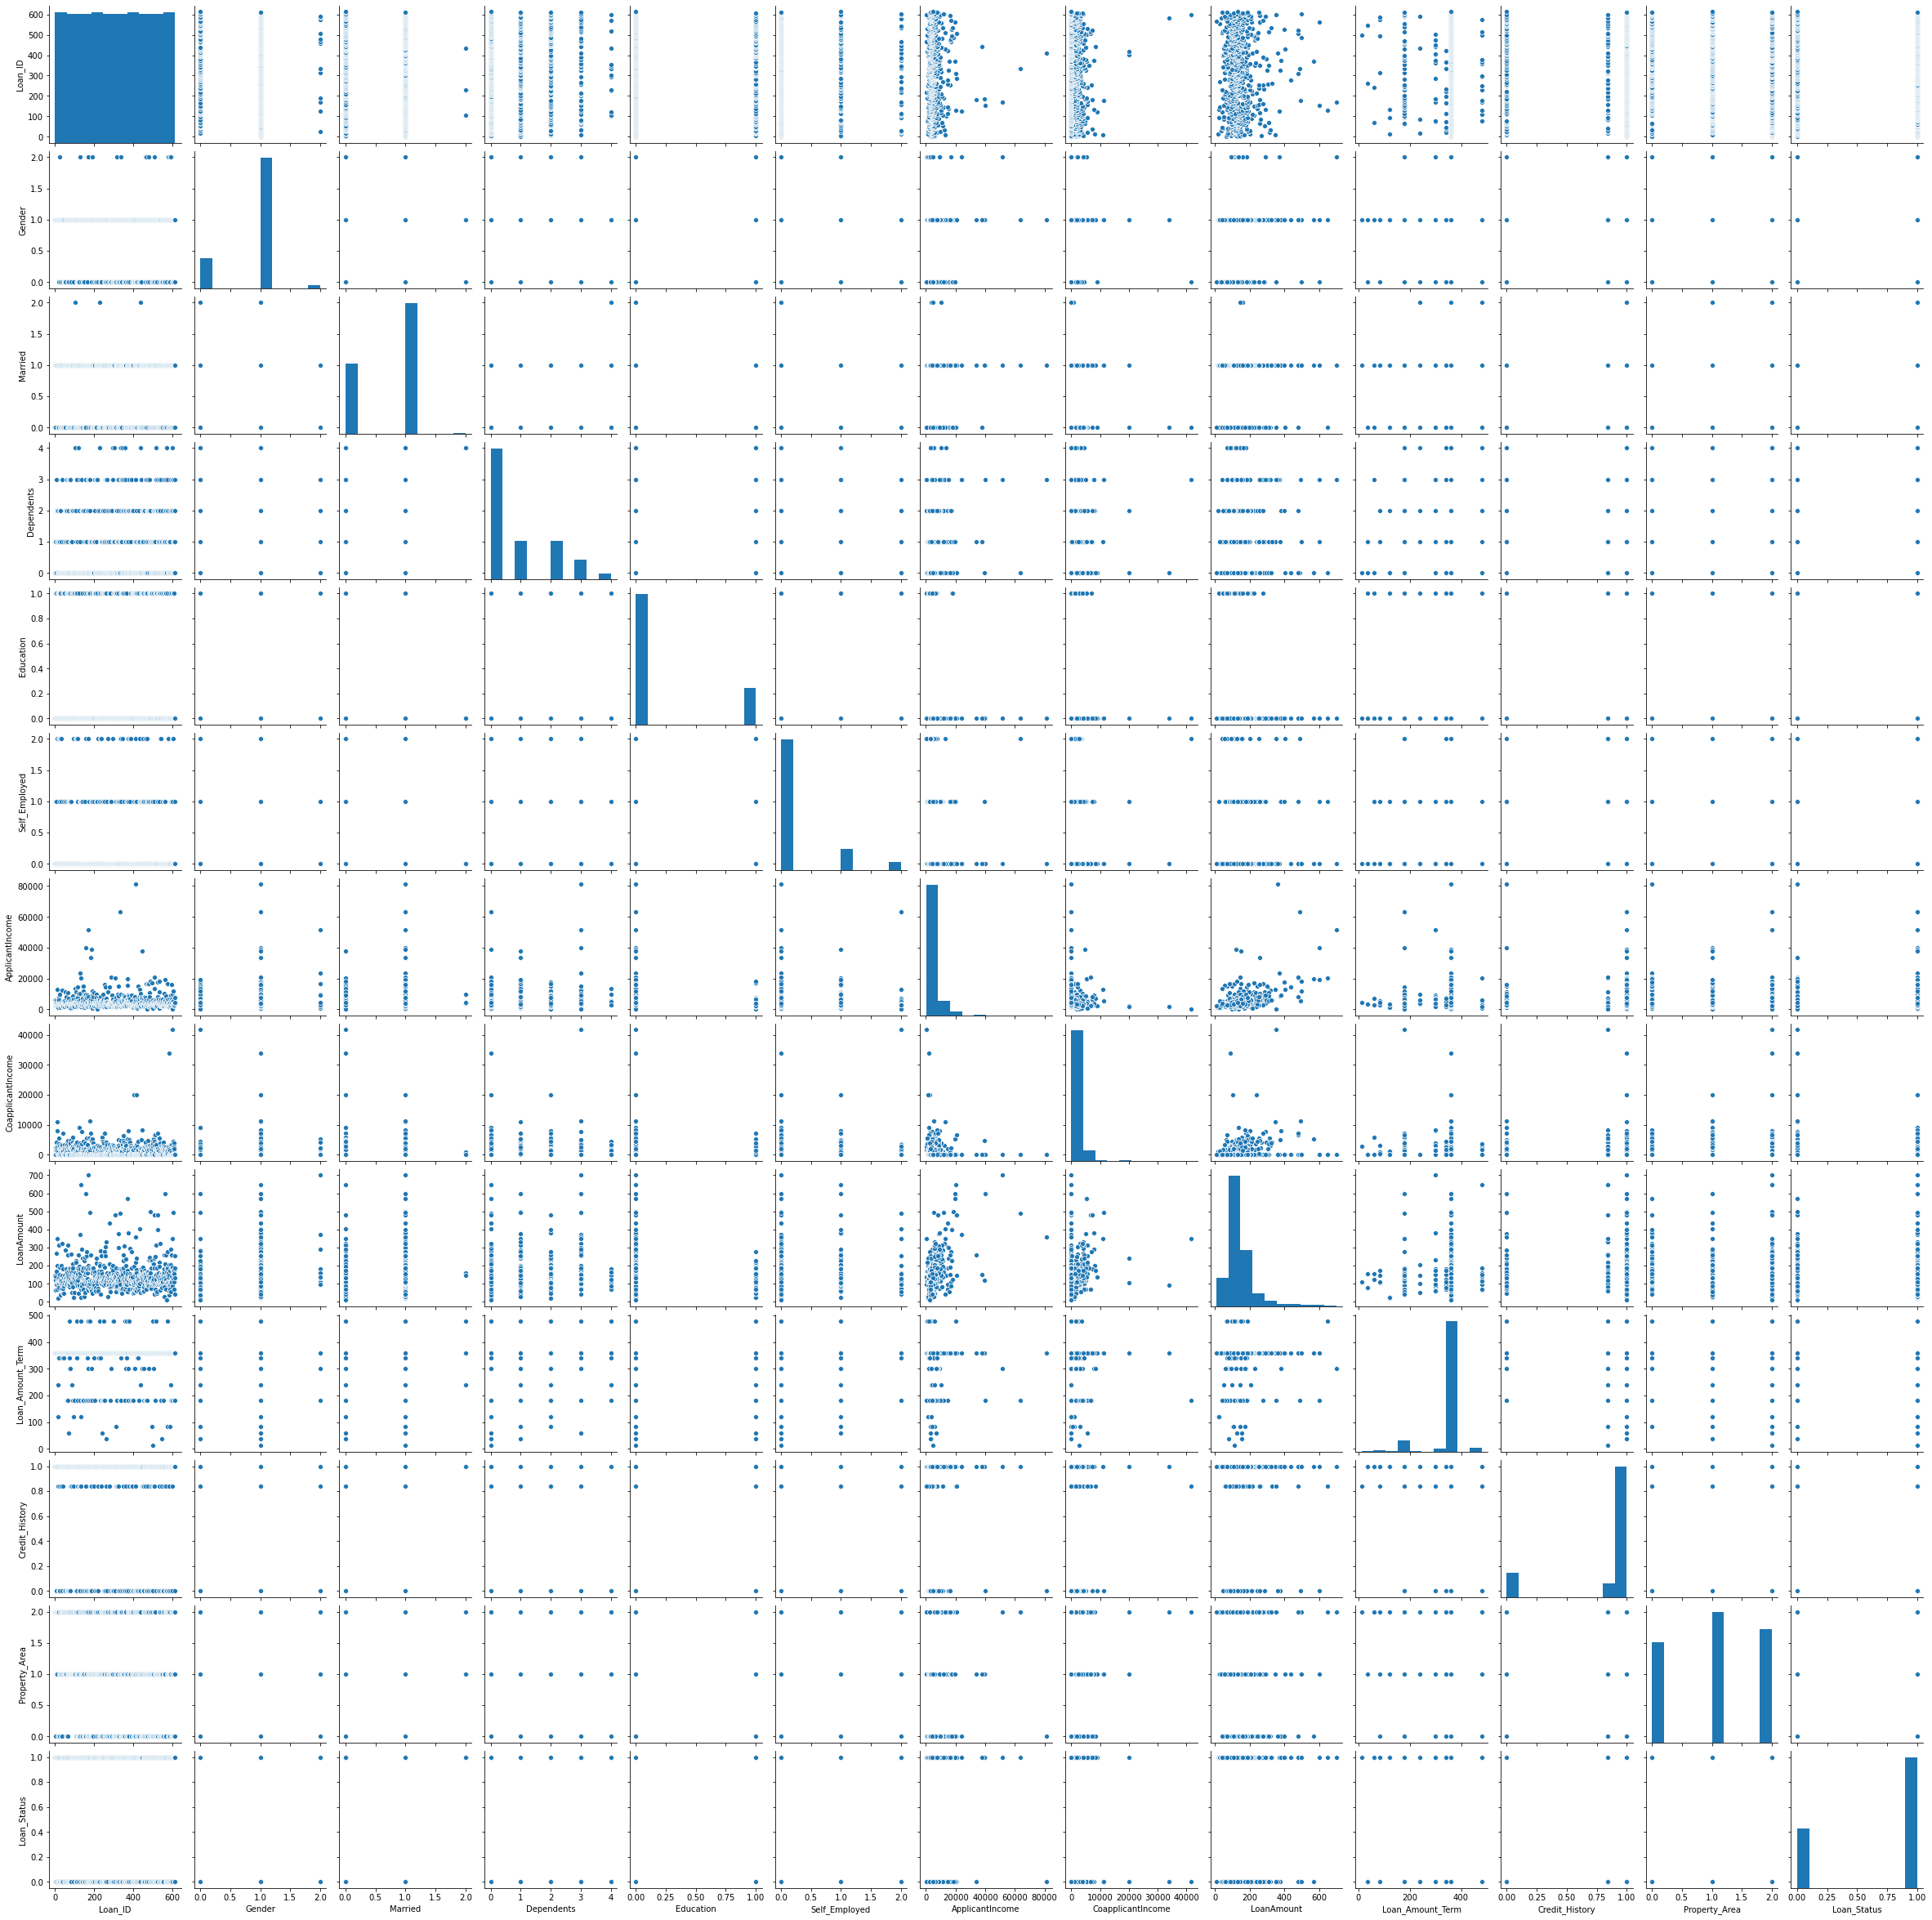

In [84]:
sns.pairplot(df)

In [27]:
collist=df.columns.values
ncol=35
nrows=11

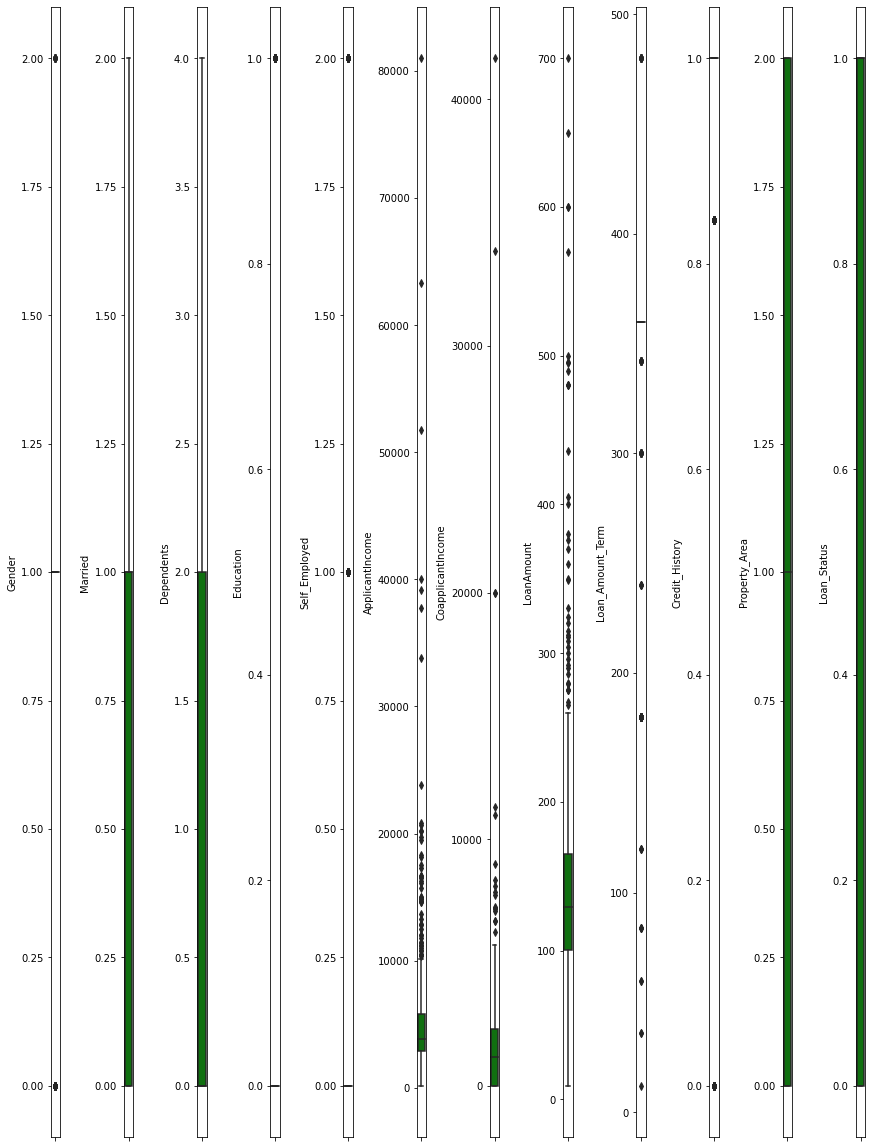

In [28]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

There are few outliers in data

## Checking outliers using boxplot

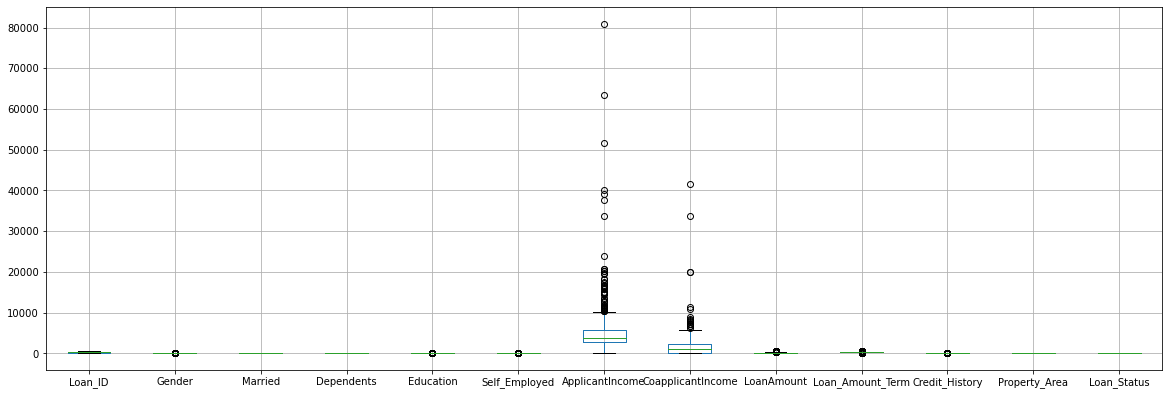

In [21]:
df.iloc[:,0:13].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

There are ouliers in ApplicantIncome, LoanAmount, Credit_History,Gender,MArried, Education,Self_employed

## Removing Outliers

In [46]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.72923217, 0.38261602, 1.35784704, ..., 0.45164045, 1.22329839,
        0.67451931],
       [1.7235903 , 0.38261602, 0.70581158, ..., 0.45164045, 1.31851281,
        1.48253724],
       [1.71794844, 0.38261602, 0.70581158, ..., 0.45164045, 1.22329839,
        0.67451931],
       ...,
       [1.71794844, 0.38261602, 0.70581158, ..., 0.45164045, 1.22329839,
        0.67451931],
       [1.7235903 , 0.38261602, 0.70581158, ..., 0.45164045, 1.22329839,
        0.67451931],
       [1.72923217, 1.99037625, 1.35784704, ..., 2.41044061, 0.04760721,
        1.48253724]])

In [47]:
threshold=3
print(np.where(z>3))

(array([  9,  11,  14,  19,  24,  29,  30,  68,  94,  95, 107, 111, 114,
       126, 130, 133, 155, 155, 158, 170, 171, 171, 177, 177, 183, 185,
       218, 231, 236, 242, 262, 268, 278, 295, 308, 313, 333, 333, 333,
       336, 344, 369, 374, 380, 385, 402, 409, 411, 417, 432, 432, 443,
       447, 463, 468, 487, 495, 497, 506, 523, 525, 535, 542, 546, 561,
       575, 579, 581, 585, 600, 600, 601, 604], dtype=int64), array([7, 5, 9, 5, 5, 5, 5, 9, 9, 5, 5, 5, 5, 6, 8, 9, 6, 8, 5, 5, 6, 8,
       7, 8, 6, 6, 5, 5, 5, 9, 9, 5, 8, 5, 8, 9, 5, 6, 8, 5, 5, 8, 5, 5,
       5, 7, 6, 5, 7, 5, 8, 6, 5, 5, 5, 8, 9, 9, 8, 8, 8, 5, 5, 9, 8, 9,
       5, 7, 9, 5, 7, 5, 8], dtype=int64))


In [48]:
z[9][7]

3.196712546212882

In [49]:
z[604][8]

4.163296162326892

In [50]:
df_new=df[(z<3).all(axis=1)]

In [51]:
 df.shape

(614, 13)

In [52]:
df_new.shape

(548, 13)

In [53]:
loss_percent=(614-548)/614*100
print(loss_percent)

10.749185667752444


All outliers are removed now our data is clean

## Checking skewness

In [54]:
x=df_new.drop("Loan_Status",axis=1)

In [55]:
x.skew()

Loan_ID              0.006474
Gender              -0.980211
Married             -0.527102
Dependents           1.126463
Education            1.299518
Self_Employed        2.164757
ApplicantIncome      2.115295
CoapplicantIncome    1.369775
LoanAmount           1.103178
Loan_Amount_Term    -2.029308
Credit_History      -1.862149
Property_Area       -0.058055
dtype: float64

There are skewness in Dependents, Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount and few other coumns

## Removing skewness

In [56]:
from sklearn.preprocessing import power_transform
df_loan=power_transform(x)
df_loan=pd.DataFrame(df_loan,columns=x.columns)

In [57]:
df_loan.skew()

Loan_ID             -0.282544
Gender               0.230693
Married             -0.297022
Dependents           0.403504
Education            1.299518
Self_Employed        2.164757
ApplicantIncome     -0.002193
CoapplicantIncome   -0.179965
LoanAmount           0.046099
Loan_Amount_Term     0.691327
Credit_History      -1.570569
Property_Area       -0.155584
dtype: float64

Skewness Removed from few columns

In [58]:
x=df_loan

In [59]:
x.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
543,1.549852,-1.812090,-1.333783,-0.849298,-0.543607,-0.392026,-0.596130,-1.115602,-1.295738,0.140492,0.517251,-1.345445
544,1.554221,0.313808,0.680995,1.474098,-0.543607,-0.392026,0.036908,-1.115602,-2.307540,-2.548461,0.517251,-1.345445
545,1.558587,0.313808,0.680995,0.761110,-0.543607,-0.392026,1.264521,0.187006,1.812838,0.140492,0.517251,1.197129
546,1.562952,0.313808,0.680995,1.246172,-0.543607,-0.392026,1.151191,-1.115602,0.945542,0.140492,0.517251,1.197129
547,1.567314,-1.812090,-1.333783,-0.849298,-0.543607,2.550853,0.236773,-1.115602,0.070085,0.140492,-2.192190,0.011204


In [60]:
y=df_new["Loan_Status"]

## Finding the best Random_State

In [61]:
from sklearn.linear_model import LogisticRegression
maxAccu=0 
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Score is",maxAccu," on Random_state",maxRS)

Best Score is 0.8848484848484849  on Random_state 29


## Creating train-test split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=29)

In [63]:
model=[GaussianNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), LogisticRegression(), RandomForestClassifier()]

In [64]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy_score of',m,'is :')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy_score of GaussianNB() is :
0.8666666666666667
[[ 29  12]
 [ 10 114]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72        41
           1       0.90      0.92      0.91       124

    accuracy                           0.87       165
   macro avg       0.82      0.81      0.82       165
weighted avg       0.86      0.87      0.87       165



Accuracy_score of SVC() is :
0.9030303030303031
[[ 28  13]
 [  3 121]]
              precision    recall  f1-score   support

           0       0.90      0.68      0.78        41
           1       0.90      0.98      0.94       124

    accuracy                           0.90       165
   macro avg       0.90      0.83      0.86       165
weighted avg       0.90      0.90      0.90       165



Accuracy_score of DecisionTreeClassifier() is :
0.7393939393939394
[[28 13]
 [30 94]]
              precision    recall  f1-score   support

           0       0.48      0.68      0.57        4

Support Vector Classifier has highest accuracy compared to others

## Cross validation

In [65]:
svr=SVC()

In [66]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gb=GaussianNB()

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
svrscores = cross_val_score(svr,x,y,cv=5)
print(svrscores.mean())

0.8231192660550459


In [69]:
gbscores = cross_val_score(gb,x,y,cv=5)
print(svrscores.mean())

0.8231192660550459


In [70]:
knnscores = cross_val_score(knn,x,y,cv=5)
print(svrscores.mean())

0.8231192660550459


In [71]:
dtscores = cross_val_score(dt,x,y,cv=5)
print(dtscores.mean())

0.6787823185988324


In [72]:
rfscores = cross_val_score(rf,x,y,cv=5)
print(rfscores.mean())

0.7757297748123436


In [73]:
lrscores = cross_val_score(lr,x,y,cv=5)
print(lrscores.mean())

0.797581317764804


Cross validation scores can be observed

Minimum difference in accuracy_score and cross validation is for KNeighbors Classifiers(2)

## Hyper parameter Tunning

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [76]:
parameters= {'n_neighbors':np.arange(2,15),
            'weights':['uniform','distance']}

In [77]:
GCV=GridSearchCV(KNeighborsClassifier(),parameters,cv=5)

In [78]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'weights': ['uniform', 'distance']})

In [79]:
GCV.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [80]:
GCV_pred=GCV.best_estimator_.predict(x_test)


In [81]:
accuracy_score(y_test,GCV_pred)

0.8545454545454545

## AUC_ROC Curve

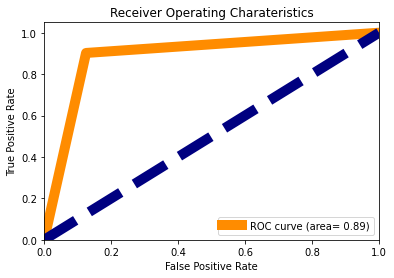

In [82]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds= roc_curve(predm,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10, label='ROC curve (area= %0.2f)'% roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=10, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Charateristics')
plt.legend(loc="lower right" )
plt.show()

## Saving the best Model

In [83]:
import joblib
joblib.dump(GCV.best_estimator_,"Loan Application Status Prediction.pkl")

['Loan Application Status Prediction.pkl']